## Task 1

*Постройте график<br>
Назовите график<br>
Сделайте именование оси x и оси y<br>
Сделайте выводы<br>*


### Условие 1.1

*Скачать файл kc_house_data.csv - приложен на платформе*

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
house=pd.read_csv('/Users/alexey/Desktop/kc_house_data.csv',sep=',',encoding = 'utf8')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Условие 1.2

*Изучите стоимости недвижимости*

In [26]:
data = house.groupby('price')['view'].agg(count='count').reset_index().sort_values(by='price')
data

,price,count
0,75000.0,1
1,78000.0,1
2,80000.0,1
3,81000.0,1
4,82000.0,1
...,...,...
4023,5350000.0,1
4024,5570000.0,1
4025,6885000.0,1
4026,7062500.0,1


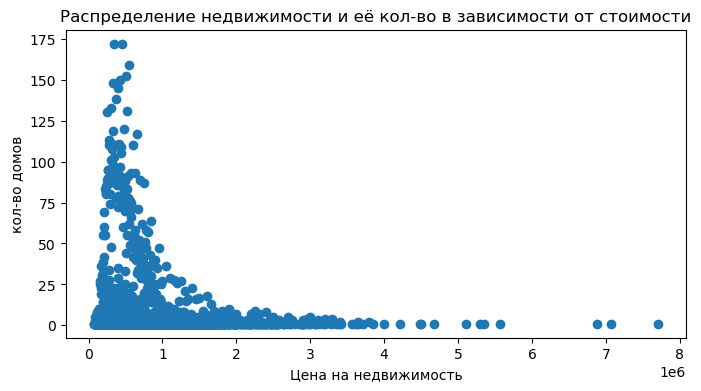

In [27]:
plt.figure(figsize=(8,4))
plt.scatter(data['price'],data['count'])
plt.title('Распределение недвижимости и её кол-во в зависимости от стоимости')
plt.xlabel('Цена на недвижимость')
plt.ylabel('кол-во домов');

*На данном графике видно , что цена около 80% всей неджижимости до 1 млн. <br>Данный график имеет обратную линейную зависимость<br>
(Чем больше цена , тем меньше домов)<br>
Слишком большие значения цены можно интерпретировать как выбросы*

### Условие 1.3

*Изучите распределение квадратуры жилой*

13540

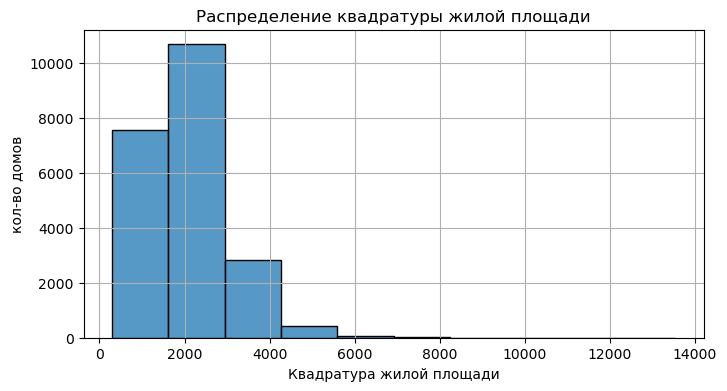

In [28]:
plt.figure(figsize=(8,4))
sns.histplot(house['sqft_living'],bins=10)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадратура жилой площади')
plt.ylabel('кол-во домов');
plt.grid()
house['sqft_living'].max()

*Практически 90 % жилой площади лежит между значениями от 1000 до 4000<br>
Большинство домов имеют жилую площадь от 2000 до 3000 кв м.<br>
Cлишком большие значения можно интерпретировать как выбросы (значения от 7000 до 14000)*

### Условие 1.4

*Изучите распределение года постройки*

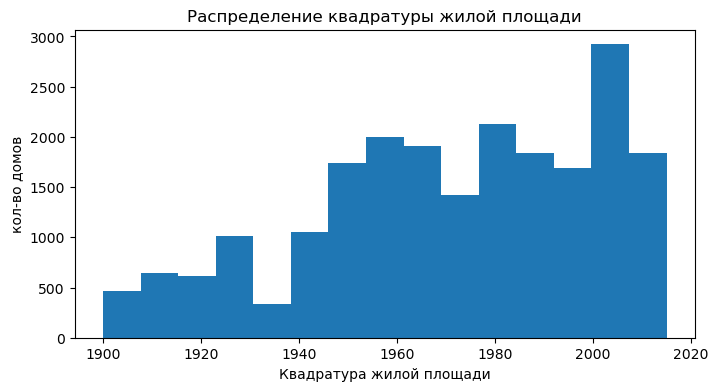

In [29]:
 plt.figure(figsize=(8,4))
plt.hist(house['yr_built'],bins=15)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадратура жилой площади')
plt.ylabel('кол-во домов');


*Большая часть домов построенна после 1950 года<br>
Также можно увидеть пик строительства (почти 3000 зданий) и это период 2000-2010 г*

## Task 2

### Условие 2.1

*Изучите распределение домов от наличия вида на набережную<br>
Постройте график<br>
Сделайте выводы*

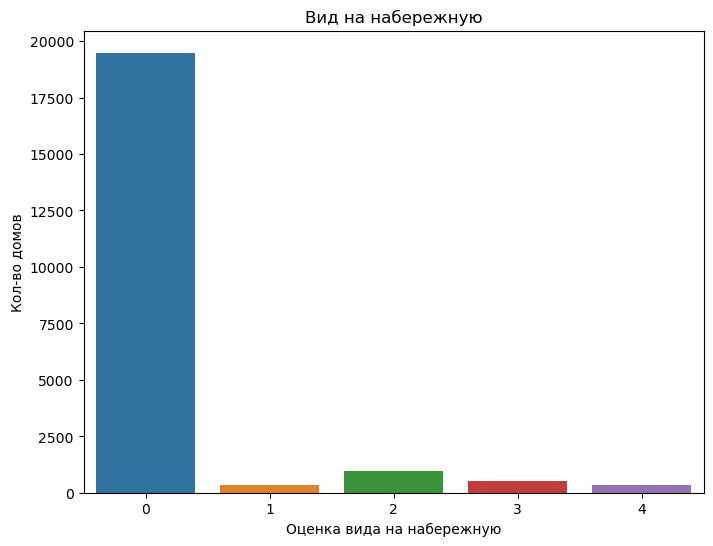

In [30]:
counts = house['view'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('Вид на набережную')
plt.ylabel('Кол-во домов')
plt.xlabel('Оценка вида на набережную')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

*Судя по диаграмме большинство домов(около 19000)без вида на набережную, с оценкой 0<br>
И около 1000 домов со средним видом на набережную с оценкой 2*

### Условие 2.2

*Изучите распределение этажей домов*

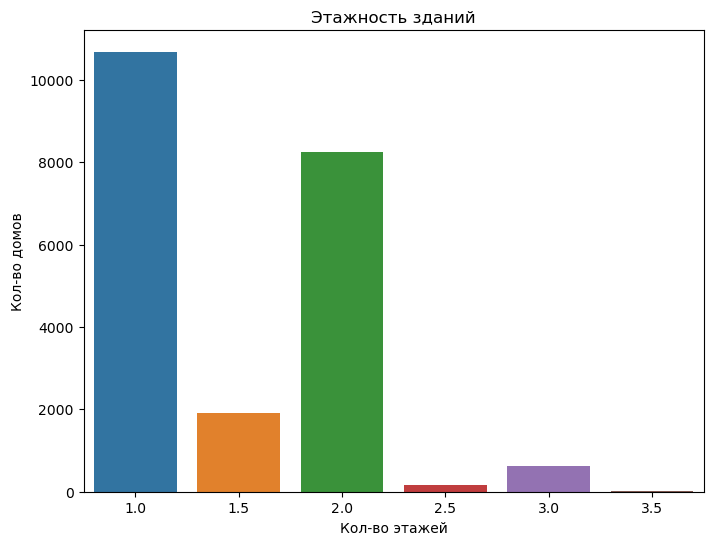

In [31]:
counts = house['floors'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('Этажность зданий')
plt.ylabel('Кол-во домов')
plt.xlabel('Кол-во этажей')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

*Большинство зданий на графике одноэтажные(более 10000),около 8000- 2-х этажных <br>
около 2000- 1,5 этажных*

### Условие 2.3

*Изучите распределение состояния домов*

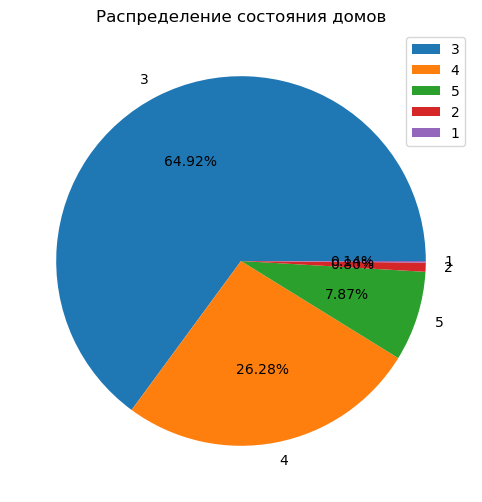

In [32]:
counts = house['condition'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('Распределение состояния домов')
plt.pie(counts.values, labels=counts.index, autopct='%1.2f%%')
plt.legend(counts.index);

*Почти 65% домов имеют оценку состояния-3(из этого можно сделать вывод,что большинство домов имеют среднее состояние)  26% домов с оценкой -4<br>
и почти 8% с оценкой -5*

## Task 3

### Условие 3.1

*Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.*

*Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.*

In [33]:
corr_matrix = house.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

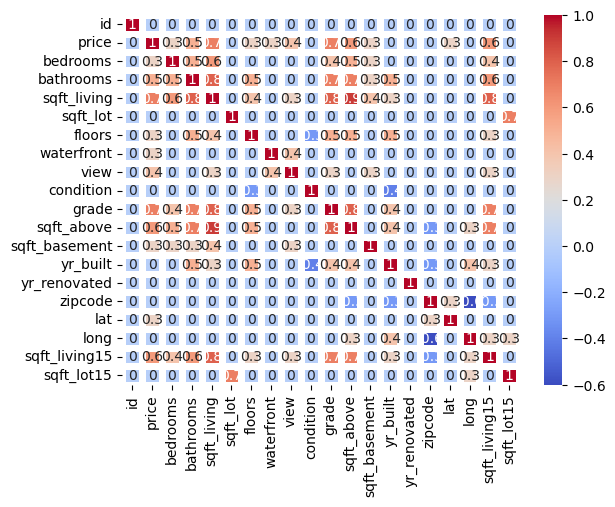

In [46]:
sns.heatmap(corr_matrix, annot=True, linewidths=5, cmap='coolwarm')

*Построим матрицу корреляций , чтобы увидеть какие характеристики влияют<br>
на стоимость недвижимости*

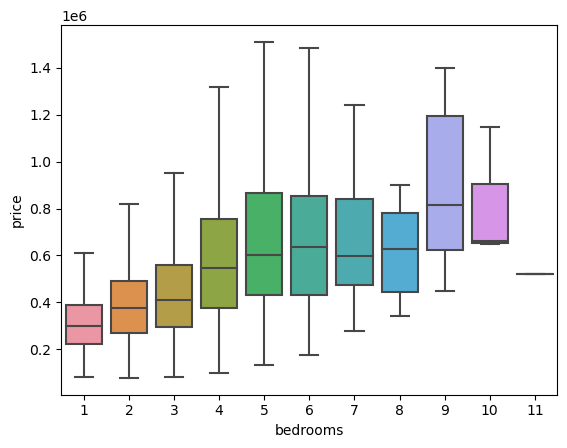

In [35]:
house.sort_values (by='price', ascending=False).head(217) 
house=house[house['price']<=1965000]
house=house[(house['bedrooms']!=0)&(house['bathrooms']!=0)]
house.loc[house['bedrooms']==33,['bedrooms']]=3 
sns.boxplot(y='price', x='bedrooms', data=house,showfliers=False);

*На данном графике можно видеть зависимость стоимости недвижимости от<br>
кол-ва спален .В основном чем  больше спален ,тем больше стоимость недвижимости( такая зависимость действует до кол-ва 5 спален , далее нет чёткой зависимости.<br>Наиболее дорогая недвижимость с 9-ью спальнями*

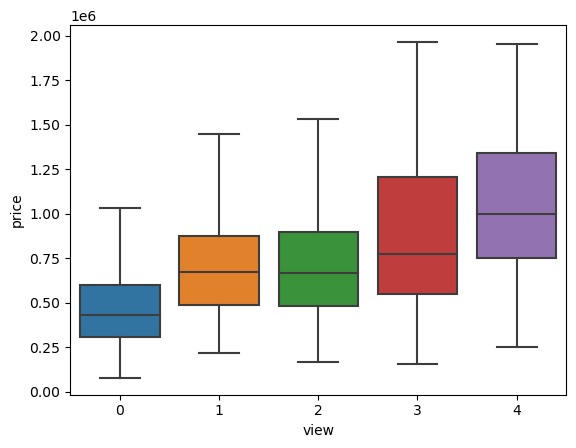

In [36]:
sns.boxplot(y=house['price'], x=house['view'], showfliers=False);

*На данном боксплоте видна зависимость цены на недвижимость от вида <br>
из окна .Чем выше оценка вида из окна , тем выше цена недвижимости.<br>
Медианы вида из окна с оценкой 1 и 2 приблизительно равны , но размах и межквартильное растояние больше у вида с оценкой 2*

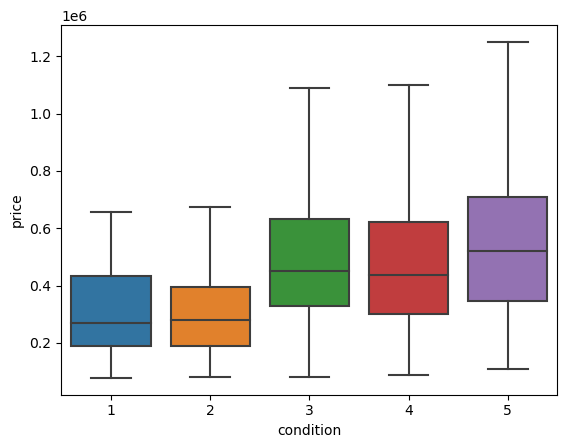

In [37]:
sns.boxplot(x=house['condition'], y=house['price'], showfliers=False);

*На данном боксплоте видна зависимость цены на недвижимость от состояния здания<br>
Дома с оценкой состояния 5 в основном имеют большую стоимость,чем все остальные<br>
Данный боксплот построен без учёта выбросов*

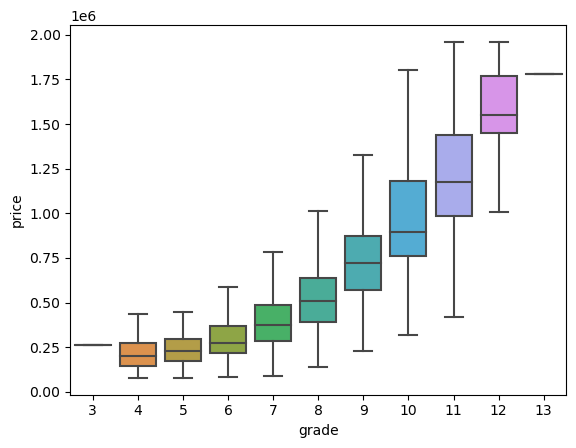

In [41]:
sns.boxplot(x=house['grade'], y=house['price'], showfliers=False);

*На данном боксплоте видна зависимость цены на недвижимость от класса здания.<br>
Чем выше класс здания , тем выше цена.*

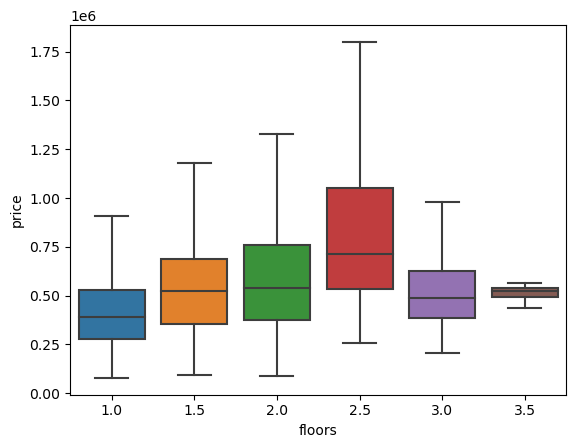

In [45]:
sns.boxplot(x=house['floors'], y=house['price'],showfliers=False );

In [ ]:
*На данном боксплоте видно , что наибольшую цену по статистике имеют<br>
здания с этажностью 2,5 

In [ ]:
*Заключение.
Изходя из всех графиков , можно сделать вывод , что больше всего на цену <br>
на недвижимость влияет риэлторская оценка дома 